---
# Demo for the Use case of graphs with various numbers of edges
---

We show 
1. how users can generate graphs with various numbers of edges, 
2. how users can execute GNNs on the generated graphs.


In [1]:
!pip install powerlaw
!pip install jgraph
# !pip install tensorflow-gpu==1.15.5

In [4]:
drive_root = "/content/drive/My Drive/Colab Notebooks/GenCAT/"
drive_root_command = "/content/drive/MyDrive/Colab\ Notebooks/GenCAT/"

import sys
import os.path
sys.path.append(os.path.join(drive_root))
import numpy as np
import time
import pandas as pd

import gencat
from func import cpm_cpd_plot, att_plot, loadData, _load_data, save_graph, compute_graph_statistics, feature_extraction

# Load Cora dataset

In [ ]:
dataset_str = "cora"
adj, features, labels = _load_data(dataset_str)
# adj, features, labels = loadData(path=drive_root+"/pyGAT-master/data/cora/")

# Visualize Class Features of Cora


*   Class preference mean represents the average node-class connection proportions for each class. 
*   Class preference deviation represents the deviation of node-class connection proportions for each class. 



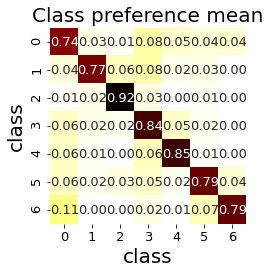

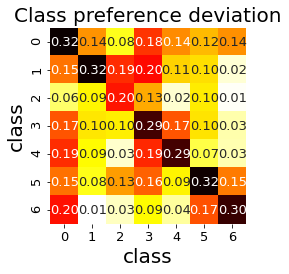

In [ ]:
_ = cpm_cpd_plot(adj, labels)

# Generate graphs with various sizes
I show two senarios

1. various numbers of edges and the fixed number of nodes
2. various numbers of nodes and the number of edges scales linearly to that of nodes

In [ ]:
### fixed nodes
tag = "_fixed_nodes_"
alpha_l =[5000, 10000, 15000, 20000, 25000, 30000]

_fixed_nodes_25000_


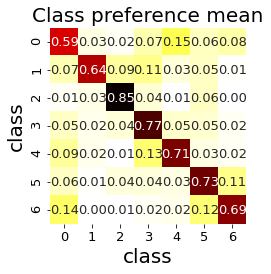

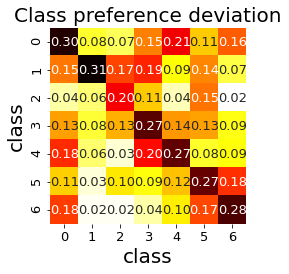

In [ ]:
for alpha in alpha_l:
  M,D,class_size,H,theta = feature_extraction(adj,features,labels)
  tag_ = tag + str(alpha) + "_"
  print(tag_)
  # for _ in range(3):
  for _ in [0]:
    S,X,Label = gencat.gencat(M,D,H,class_size=class_size,n=len(theta),m=alpha,att_type="Bernoulli")
    out_planetoid(S,X,Label,dataset_str="GenCAT_"+dataset_str+tag_+str(_))
    _ = cpm_cpd_plot(S,Label)

# Excecution of Graph Analytic Methods
+ GCN (ICLR 2017)
+ GAT (ICLR 2018)
+ H2GCN (NeurIPS 2020)

# GCN

In [ ]:
data = "GenCAT_cora"
# data = "GenCAT_cora_hetero"
# data = "GenCAT_citeseer"
# data = "cora"

method = drive_root_command + "gcn-master/gcn/train.py"

for alpha in alpha_l:
  data_ = data + tag + str(alpha) + "_"
# for _ in [9]:
# for _ in range(10):
  # data_ = data + tag + str(_) + "_" 
  # for dataIter in range(3): 
  for dataIter in [0]: 
    data_in = data_ + str(dataIter)
    print(data_in)
    for i in range(3):
    # for i in [0]:
      start = time.time()
      # magic command
      !python $method --dataset $data_in --epochs 2000 --early_stopping 40 --hidden1 8 --iter_count $i
      elapsed_time = time.time() - start
      print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

GenCAT_cora_fixed_nodes_25000_0
1 Physical GPUs, 1 Logical GPUs
Early stopping...
elapsed_time:11.080446481704712[sec]
Optimization Finished!
Test set results: cost= 0.77527 accuracy= 0.87616 time= 0.00504
elapsed_time:14.272560358047485[sec]
1 Physical GPUs, 1 Logical GPUs
Early stopping...
elapsed_time:7.773333311080933[sec]
Optimization Finished!
Test set results: cost= 0.90830 accuracy= 0.82810 time= 0.00486
elapsed_time:10.854264497756958[sec]
1 Physical GPUs, 1 Logical GPUs
Early stopping...
elapsed_time:9.504474878311157[sec]
Optimization Finished!
Test set results: cost= 0.82997 accuracy= 0.83549 time= 0.00490
elapsed_time:12.660720825195312[sec]


# GAT

In [ ]:
data = "GenCAT_cora"
# data = "GenCAT_cora_hetero"
# data = "GenCAT_citeseer"
# data = "pubmed"
# data = "citeseer"

tag = "_fixed_nodes_"
alpha_l =[5000, 10000, 15000, 20000, 25000, 30000]

method = drive_root_command + "GAT-master/execute_cora_sparse.py"

for alpha in alpha_l:
  data_ = data + tag + str(alpha) + "_"
  for dataIter in range(3):
  # for dataIter in [1]: 
    data_in = data_ + str(dataIter)
    print(data_in)
    for i in range(3):
    # for i in [1,2]:
      start = time.time()
      !python $method --dataset $data_in --iter_count $i --l2_coef 5e-5
      elapsed_time = time.time() - start
      print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

GenCAT_cora_fixed_nodes_20000_0
1 Physical GPUs, 1 Logical GPUs
Early stop! Min loss:  0.5466318726539612 , Max accuracy:  0.8652072548866272
Early stop model validation loss:  0.5466318726539612 , accuracy:  0.8652072548866272
Test loss: 0.4088660478591919 ; Test accuracy: 0.9020333290100098
elapsed_time:344.43430280685425[sec]
elapsed_time:356.1456024646759[sec]
1 Physical GPUs, 1 Logical GPUs
Early stop! Min loss:  0.5396470427513123 , Max accuracy:  0.865207314491272
Early stop model validation loss:  0.5396470427513123 , accuracy:  0.8640552163124084
Test loss: 0.40825650095939636 ; Test accuracy: 0.9149723649024963
elapsed_time:304.19238114356995[sec]
elapsed_time:307.68255162239075[sec]
1 Physical GPUs, 1 Logical GPUs
Early stop! Min loss:  0.5466764569282532 , Max accuracy:  0.864055335521698
Early stop model validation loss:  0.6244835257530212 , accuracy:  0.8594470620155334
Test loss: 0.41781899333000183 ; Test accuracy: 0.8964880108833313
elapsed_time:382.8959891796112[sec]

# H2GCN 
This method requires a higher version of tensorflow than GCN and GAT. 

In [ ]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 38 kB/s 
     |████████████████████████████████| 449 kB 65.7 MB/s 
     |████████████████████████████████| 3.8 MB 60.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 1.15.5
    Uninstalling tensorflow-gpu-1.15.5:
      Successfully uninstalled tensorflow-gpu-1.15.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.2.2 which is incomp

In [6]:
data = "GenCAT_cora"
# data = "GenCAT_cora_hetero"
# data = "GenCAT_citeseer"
# data = "GenCAT_pubmed"
# data = "cora"

tag = "_fixed_nodes_"

data_ind = data
dataset_path = drive_root_command + "datasets"

method = drive_root_command + "H2GCN-master/h2gcn/run_experiments.py"
alpha_l =[5000, 10000, 15000, 20000, 25000, 30000]


# for _ in [9]:
# for alpha in [5000]:
for alpha in alpha_l:
  data_ = data_ind + tag + str(alpha) + "_"
# for _ in range(10):
  # data_in = data_ + tag + str(_) + "_"
  for dataIter in range(3):
  # for dataIter in [1]: 
    data_in = data_ + str(dataIter)
    print(data_in)
    for i in range(3):
    # for i in [0]:
      start = time.time()
      !python $method H2GCN planetoid --dataset $data_in --iter_count $i
      #  --dataset_path $dataset_path
      # elapsed_time = time.time() - start
      # print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

GenCAT_cora_fixed_nodes_5000_0
1 Physical GPUs, 1 Logical GPUs
Model: "h2gcn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sparse_dense (SparseDense)   multiple                  91712     
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
gcn_layer (GCNLayer)         multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
gcn_layer_1 (GCNLayer)       multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
________________________________________________________________